In [9]:
include("../comum.jl")
include("../modelos.jl")
using Evolutionary, Plots, LinearAlgebra;
pyplot();

In [4]:
Ts     = 0.05 # Intervalo entre leituras da saída
tend   = 2.0  # tempo final para estabilização
t0     = 0.0  # instante inicial

popul  = 20   # população
iterac = 15   #iterações
α = 10.       #parâmetro para o erro
β = 0.01      #parâmetro para o jerk
γ = 0.1       #parâmetro para o torque
per = 1/2     #inicio da leitura do vetor a parti de per do comprimento total

x1, v1, a1, j1 = minimumjerkf(0.0, 0.0, 0.0,0.0, 0.6, 0.0, 0.0, tend)
x2, v2, a2, j2 = minimumjerkf(0.0, 0.0, 0.0,0.0, 0.8, 0.0, 0.0, tend)
xr = [x1,x2]
vr = [v1,v2]
ar = [a1, a2]
jr = [j1,j2];

In [5]:
kp_end = AbstractFloat[]
kv_end = AbstractFloat[];

# Custo

In [21]:
function generateCusto(junta::Integer)
    out = function custo(gain::Vector{Float64})
        kp = SMatrix{2,2}(diagm(0 => [gain[1], gain[2]]))
        kv = SMatrix{2,2}(diagm(0 => [gain[3], gain[4]]))
        x, v, t, a, ta, j, tj, τ, t_tau = robot2dof(kp, kv, Ts, t0, tend, xr, vr)
        
        sizeVector = length(x[1])
        erro_sum = 0.
        erro = -(x[junta] .- map(i->xr[junta](i), t))
        erro_sum += sum(abs.(erro[floor(Integer,sizeVector*per):end])) 

        jerk_sum = 0.
        jerk_sum += sum(abs.(j[junta]))
        
        torque_sum = 0.
        torque_sum += sum(abs.(τ[junta]))
        
        torque_dif = 0.
        torque_dif += sum(abs.(diff(τ[junta])))
        
        
        erro_sum = erro_sum * α
        jerk_sum = jerk_sum * β 
        torque_sum = torque_sum * γ
        println(" $(erro_sum) | $(jerk_sum) | $(torque_sum) | $(torque_dif)")
        out =  erro_sum + jerk_sum + torque_sum + torque_dif
        out
    end
end;

# Otimização junta 2

In [22]:
function gerador2(n)
    n = round(Int, n/2)
    kp = push!(zeros(n-1),rand()*rand([10.,100.,1000.,10000]))
    kv = push!(zeros(n-1),rand()*rand([10.,100.,1000.]))
    vcat(kp,kv)
end;

In [23]:
N = 4
 result, fitness, cnt = ga(generateCusto(2), N; initPopulation = gerador2, populationSize = popul, ɛ = 0.1, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 0.0% 0.6353587016258289 | 34.882675691740566 | 4.085858275198343 | 15.632908369720031
 1.279954941556145 | 1.0688791617894355 | 4.053817338746813 | 5.533423136027359
 2.3657670950184793 | 1.451700482735471 | 4.0589937235019855 | 5.634895621038759
 0.04318278653471397 | 1.0130299516605574 | 4.058854716746865 | 5.529692463475783
 17.50068420275174 | 6.975102648643202 | 4.2738915948921905 | 7.5430113095211775
 0.02868798860826527 | 0.9813434355799338 | 4.058689224542294 | 5.553022237496787
 1.0340699577105283 | 1.4992415641054886 | 4.062563087807074 | 5.596291292326358
 8.320701893546373 | 5.9388647107852846 | 4.158733373752823 | 7.283434237576869
 1.1656201683394136 | 97.95026165738166 | 4.369281921654672 | 43.57673471492973
 0.2015063020314567 | 1.0619160858686048 | 4.058456988470752 | 5.5246431097848445
 3.454962973477858 | 1.504538936502329 | 4.064024139352963 | 5.652417958770827
 0.36782359356055616 | 1.1135713221868682 

┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/phelipe/.julia/packages/DiffEqBase/hgqYE/src/integrator_interface.jl:128


 1.279954941556145 | 1.0688791617894355 | 4.053817338746813 | 5.533423136027359
 0.04318278653471397 | 1.0130299516605574 | 4.058854716746865 | 5.529692463475783
 0.8794630487501465 | 0.962566376120739 | 4.0517608477231875 | 5.543851050129549
 0.1916017315894264 | 0.9728441389014769 | 4.058147771031792 | 5.5336354495957565
 NaN | NaN | NaN | NaN
 Progress:|██████████████████████████████████████████████████| 7.0% 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/phelipe/.julia/packages/DiffEqBase/hgqYE/src/integrator_interface.jl:128


 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.18100164192930646 | 1.2124611020685752 | 4.055844417804795 | 5.587074096326541
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.02868798860826527 | 0.9813434355799338 | 4.058689224542294 | 5.553022237496787
 0.181048202697765 | 1.212

┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/phelipe/.julia/packages/DiffEqBase/hgqYE/src/integrator_interface.jl:128


 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 NaN | NaN | NaN | NaN
 Progress:|██████████████████████████████████████████████████| 13.0% 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/phelipe/.julia/packages/DiffEqBase/hgqYE/src/integrator_interface.jl:128


 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.02868798860826527 | 0.9813434355799338 | 4.058689224542294 | 5.553022237496787
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1791781411761223 | 1.3162127459908664 | 3.9780967922691497 | 5.620587353637899
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 NaN | NaN | NaN | NaN
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/phelipe/.julia/packages/DiffEqBase/hgqYE/src/integrator_interface.jl:128


 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.1810018999706159 | 1.2124437694693249 | 4.055862648727863 | 5.587058226510246
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 NaN | NaN | NaN | NaN
 Progress:|███████████████████████████████████████████████████| 20.0% 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/phelipe/.julia/packages/DiffEqBase/hgqYE/src/integrator_interface.jl:128


 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.18103066947155744 | 1.2164464139916331 | 4.056121654401802 | 5.590114008285219
 0.02868798860826527 | 0.9813434355799338 | 4.058689224542294 | 5.553022237496787
 0.1809365195342

([-0.000129568, 6007.65, 0.209628, 365.796], 10.312936690607877, 15, 0.040780277699553835, Dict{Symbol,Any}())

In [28]:
push!(kp_end, result[2])
push!(kv_end, result[4])
println("---|junta 2\n---|---\n**KP**|$(round(result[2],digits=2))\n**KV**|$(round(result[4],digits=2))")

---|junta 2
---|---
**KP**|6007.65
**KV**|365.8


# Otimização junta 1

In [29]:
function gerador1(n)
    n = round(Int, n/2)
    kp = push!(zeros(n-2),rand()*rand([10.,100.,1000.,10000]))
    push!(kp,result[2])
    kv = push!(zeros(n-2),rand()*rand([10.,100.,1000.]))
    push!(kv,result[4])
    vcat(kp,kv)
end;

In [30]:
N = 4
 result, fitness, cnt = ga(generateCusto(1), N; initPopulation = gerador1, populationSize = popul, ɛ = 0.1, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 0.0% 70.99179512479685 | 1.9170498267363847 | 108.62227012559377 | 19.234449960331393
 11.170001382245651 | 12.482631497185503 | 103.62831590202998 | 117.99762842678678
 6.119817499302957 | 0.9982716082260079 | 103.05877380006496 | 13.926514709353768
 245.92767043693289 | 14.157059841389227 | 37.63891018468905 | 39.82724392086503
 374.85591001544947 | 5.9058767706091535 | 51.26465666777598 | 39.819845369958514
 6.513311753786017 | 14.139659774937941 | 103.06558154015043 | 132.95034807538693
 0.9222311377265913 | 53.006381265057634 | 102.23715376955948 | 497.5114094037074
 0.5782381628073607 | 45.96460802254425 | 102.48259646292809 | 430.0457313564583
 12.912789427092367 | 23.573996736440073 | 104.27745318273703 | 222.75059886033102
 4.725194030352185 | 0.7704481318236196 | 102.85474737847467 | 11.802907468456901
 0.8969233381389774 | 1.977314985212839 | 102.32696253564465 | 23.287799025156275
 8.592675000750818 | 2.0285714

([6323.9, 6007.65, 433.933, 365.855], 116.23357450139235, 15, 0.0, Dict{Symbol,Any}())

In [31]:
push!(kp_end, result[1])
push!(kv_end, result[3])
println("---|junta 1\n---|---\n**KP**|$(round(result[1],digits=2))\n**KV**|$(round(result[3],digits=2))")

---|junta 1
---|---
**KP**|6323.9
**KV**|433.93


# Resultado otimização

In [34]:
kp = SMatrix{2,2}(diagm(0=>reverse(kp_end[1:2])))
kv = SMatrix{2,2}(diagm(0=>reverse(kv_end[1:2])))
x, v, t, a, ta, j, tj, τ, t_tau = robot2dof(kp, kv, Ts, t0, tend, xr, vr)
erro1 = -(x[1] .- map(i->xr[1](i), t))
erro2 = -(x[2] .- map(i->xr[2](i), t))
erro = [erro1, erro2]

function plotx()
    p1 = plot(t,x[1], label = "PD ótimo - junta 1",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p1= plot!(t,map(i->xr[1](i), t), label = "referência");
    p2 = plot(t,x[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p2 = plot!(t,map(i->xr[2](i), t), label = "referência");
    plot(p1,p2, title = "Posição")
end

function plotj()
    p1 = plot(tj,j[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    p2 = plot(tj,j[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    plot(p1,p2, title = "Arrancada")
end;

function plotTau()
    p1 = plot(t_tau,τ[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    p2 = plot(t_tau,τ[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    plot(p1,p2, title = "Torque")
end;

function plotv()
    p1 = plot(t,v[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    p2 = plot(t,v[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    plot(p1,p2, title = "Velocidade")
end;

function plota()
    p1 = plot(ta,a[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    p2 = plot(ta,a[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    plot(p1,p2, title = "Aceleração")
end;


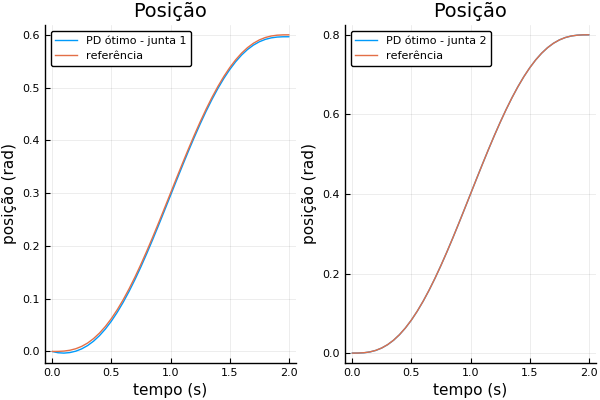

In [35]:
plotx()

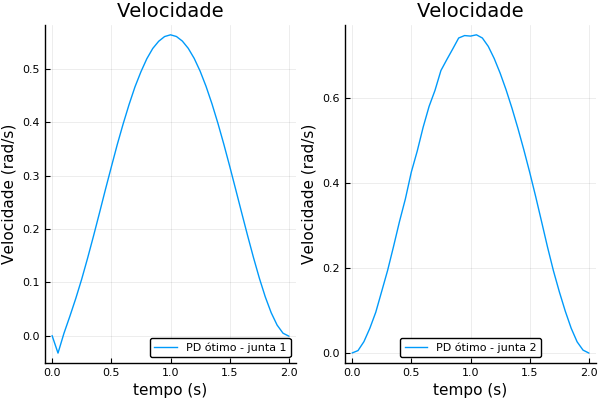

In [36]:
plotv()

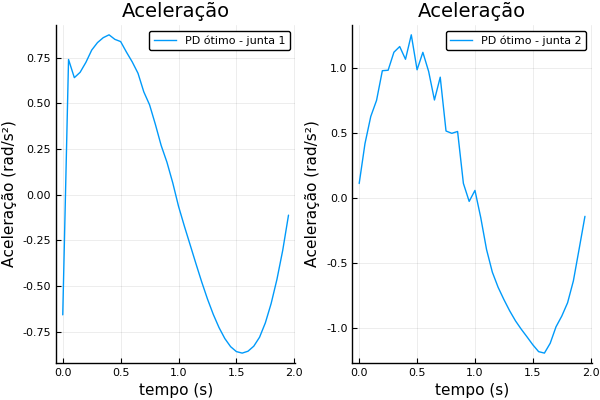

In [37]:
plota()

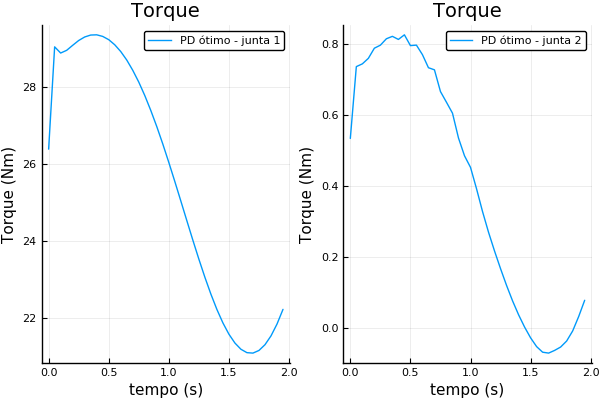

In [38]:
plotTau()

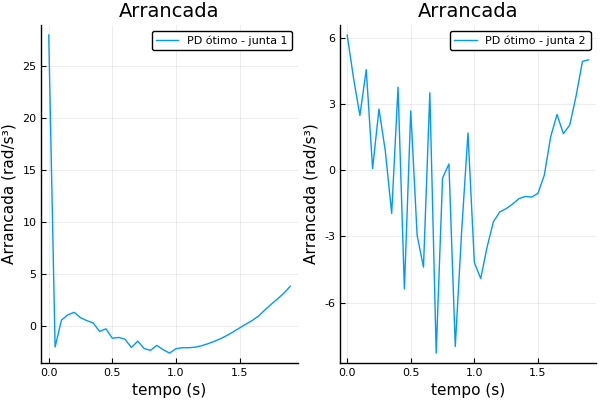

In [39]:
plotj()

# Simulação PD

In [40]:
#kp_pid = SMatrix{2,2}(diagm([2800., 80.]))
#kv_pid = SMatrix{2,2}(diagm([315., 15.]))
kp_pid = SMatrix{2,2}(diagm(0=>[8550., 160.]))
kv_pid = SMatrix{2,2}(diagm(0=>[415., 15.]))
x_pid, v_pid, t_pid, a_pid, ta_pid, j_pid, tj_pid, τ_pid, t_tau_pid = robot2dof(kp_pid, kv_pid, Ts, t0, tend, xr,vr)
erro1_pd = -(x_pid[1] .- map(i->xr[1](i), t_pid))
erro2_pd = -(x_pid[2] .- map(i->xr[2](i), t_pid))


erro_pd = [erro1_pd, erro2_pd]

function plotx_pd()
    p1 = plot(t_pid,x_pid[1], label = "PD - junta 1",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p1= plot!(t_pid,map(i->xr[1](i), t_pid), label = "referência");
    p2 = plot(t_pid,x_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p2 = plot!(t_pid,map(i->xr[2](i), t_pid), label = "referência");
    plot(p1,p2, title = "Posição")
end

function plotj_pd()
    p1 = plot(tj_pid,j_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    p2 = plot(tj_pid,j_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    plot(p1,p2, title = "Arrancada")
end;

function plotTau_pd()
    p1 = plot(t_tau_pid,τ_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    p2 = plot(t_tau_pid,τ_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    plot(p1,p2, title = "Torque")
end;

function plotv_pd()
    p1 = plot(t_pid,v_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    p2 = plot(t_pid,v_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    plot(p1,p2, title = "Velocidade")
end;

function plota_pd()
    p1 = plot(ta_pid,a_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    p2 = plot(ta_pid,a_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    plot(p1,p2, title = "Aceleração")
end;

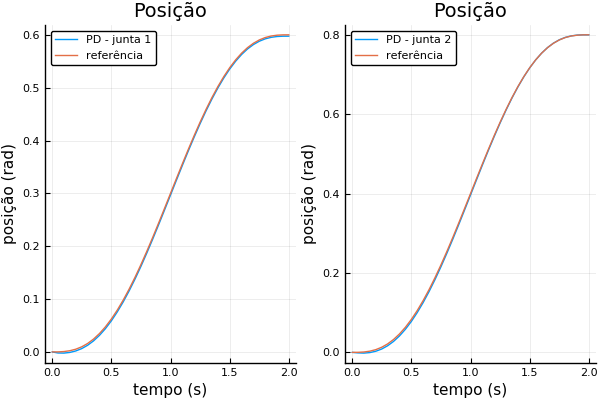

In [41]:
plotx_pd()

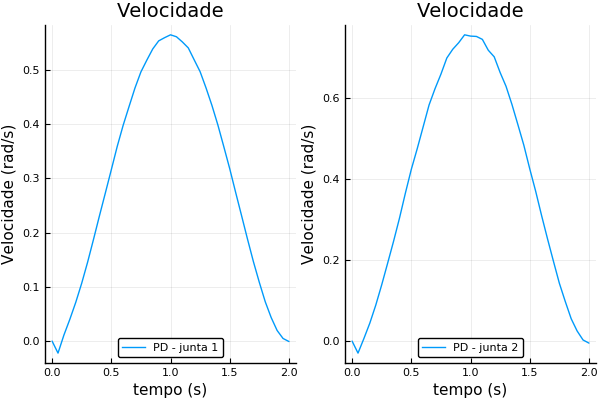

In [42]:
plotv_pd()

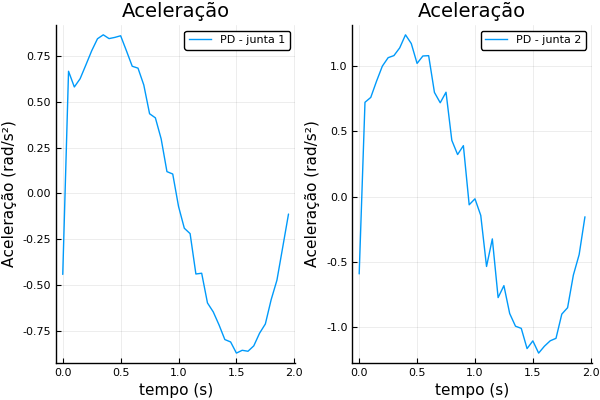

In [43]:
plota_pd()

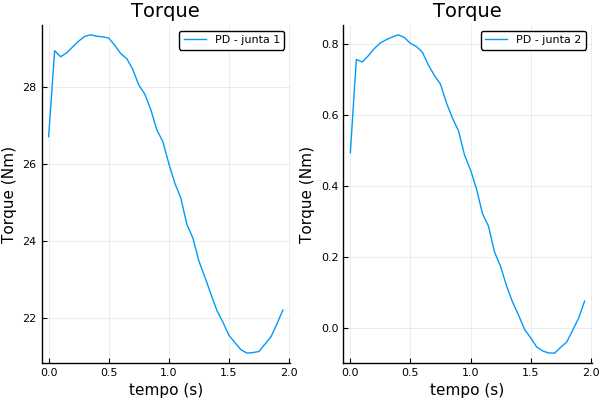

In [44]:
plotTau_pd()

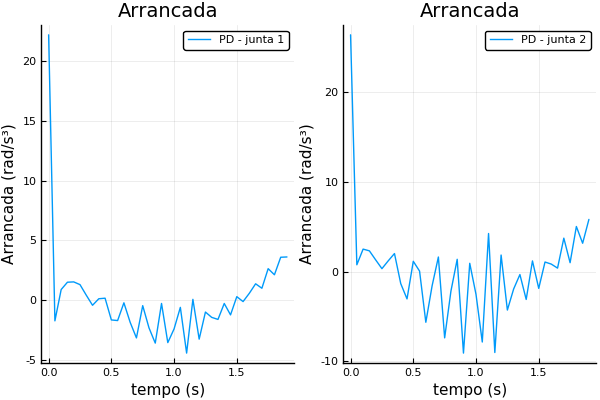

In [45]:
plotj_pd()

# Comparativo

## Erro

In [46]:
tabela(erro_pd, "Erro PD")

---|junta 1|junta 2
---|---|---
**Erro PD máximo**| 0.0 | 0.01 
**Erro PD mínimo**| 0.0 | 0.0 
**Erro PD total**| 0.12 | 0.1 


In [47]:
tabela(erro, "Erro Otimizado")

---|junta 1|junta 2
---|---|---
**Erro Otimizado máximo**| 0.0 | 0.0 
**Erro Otimizado mínimo**| 0.0 | 0.0 
**Erro Otimizado total**| 0.17 | 0.0 


## Torque

In [48]:
tabela(τ_pid, "Torque PD")

---|junta 1|junta 2
---|---|---
**Torque PD máximo**| 29.37 | 0.83 
**Torque PD mínimo**| 21.08 | 0.0 
**Torque PD total**| 1022.86 | 16.98 


In [49]:
tabela(τ, "Torque Otimizado")

---|junta 1|junta 2
---|---|---
**Torque Otimizado máximo**| 29.37 | 0.83 
**Torque Otimizado mínimo**| 21.09 | 0.0 
**Torque Otimizado total**| 1023.21 | 16.95 


## Jerk

In [50]:
tabela(j_pid, "Jerk PD")

---|junta 1|junta 2
---|---|---
**Jerk PD máximo**| 22.19 | 26.34 
**Jerk PD mínimo**| 0.08 | 0.05 
**Jerk PD total**| 80.55 | 131.14 


In [51]:
tabela(j, "Jerk otimizado")

---|junta 1|junta 2
---|---|---
**Jerk otimizado máximo**| 27.96 | 8.29 
**Jerk otimizado mínimo**| 0.16 | 0.07 
**Jerk otimizado total**| 84.6 | 113.2 
